Kasper et al., 2003

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
from cdasws import CdasWs
cdas = CdasWs()
from matplotlib import pyplot as plt
from astropy import units as u
from datetime import timedelta
import spcphys_common_functions as scf
from scipy.constants import physical_constants

In [3]:
TIME_RANGE = [datetime(1997, 4, 30), datetime(1997, 5, 1)]

_, proton_data = cdas.get_data(dataset='WI_PM_3DP', variables=['P_DENS', 'P_VELS', 'P_TEMP', 'P_TENS'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])
_, mag_data = cdas.get_data(dataset='WI_H0_MFI', variables=['B3GSE'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])

In [15]:
b_p = scf.preprocess.down_sample(
    scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values),
    scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values),
    mag_data['B3GSE'].values,
    method='mean'
)
Tp_para, Tp_perp = scf.vth_E_T.E_tensor_to_E(
    E_tensor=physical_constants['proton mass'][0] * u.kg * proton_data['P_TENS'].values * u.km**2 / u.s**2, 
    b=b_p * u.nT
)

/opt/miniconda3/envs/spcphys/lib/python3.11/site-packages/spcphys_common_functions/parameters/vth_E_T.py:40: UserWarning: Assuming E_tensor is Txx, Tyy, Tzz, Txy, Txz, and Tyz of the temperature tensor.
  warnings.warn('Assuming E_tensor is Txx, Tyy, Tzz, Txy, Txz, and Tyz of the temperature tensor.', UserWarning)


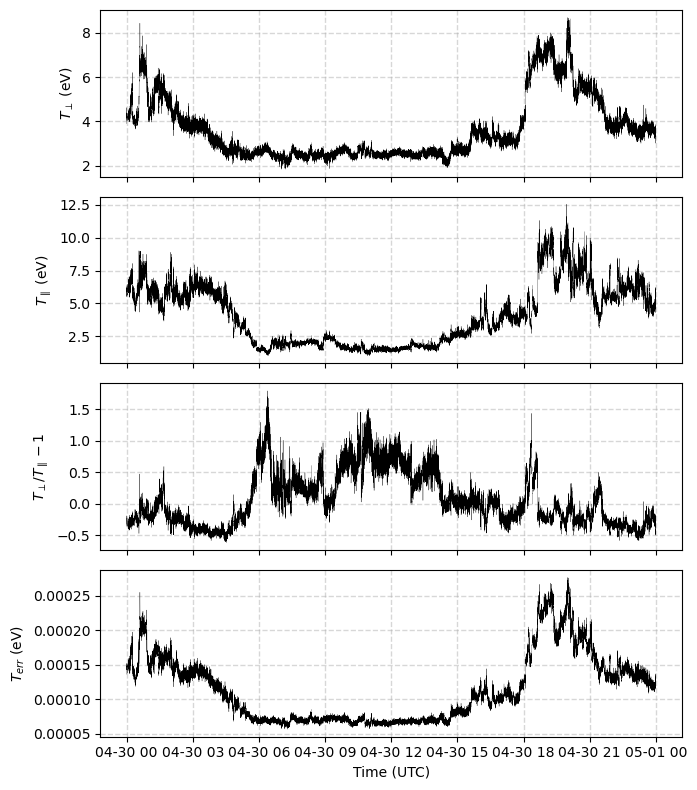

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(7, 8), sharex=True)

ax[0].plot(proton_data['Epoch'], Tp_perp.to(u.eV), 'k-', lw=0.2)
ax[0].set_ylabel(r'$T_\perp$ (eV)')

ax[1].plot(proton_data['Epoch'], Tp_para.to(u.eV), 'k-', lw=0.2)
ax[1].set_ylabel(r'$T_\parallel$ (eV)')

ax[2].plot(proton_data['Epoch'], Tp_perp/Tp_para - 1, 'k-', lw=0.2)
ax[2].set_ylabel(r'$T_\perp/T_\parallel - 1$')

ax[3].plot(proton_data['Epoch'], proton_data['P_TEMP'].values * u.eV - (Tp_para.to(u.eV) + 2*Tp_perp.to(u.eV))/3, 'k-', lw=0.2)
ax[3].set_ylabel(r'$T_{err}$ (eV)')

[ax_i.grid(True, which='both', ls='--', lw=1, alpha=0.5) for ax_i in ax]

ax[-1].set_xlabel('Time (UTC)')

fig.tight_layout()

In [17]:
Tp_para, Tp_perp = scf.vth_E_T.E_to_T(E=Tp_para), scf.vth_E_T.E_to_T(E=Tp_perp)

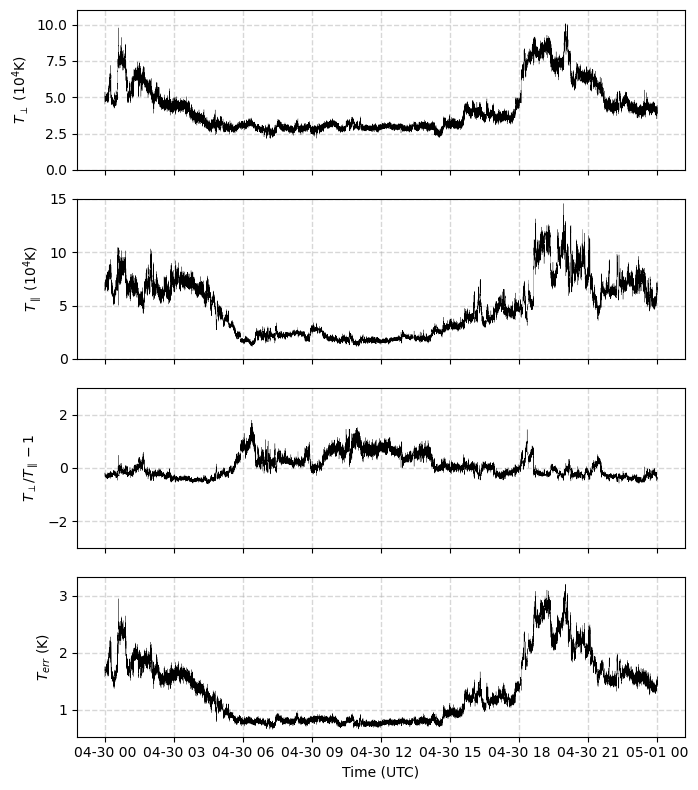

In [18]:
fig, ax = plt.subplots(4, 1, figsize=(7, 8), sharex=True)

ax[0].plot(proton_data['Epoch'], Tp_perp/1e4, 'k-', lw=0.2)
ax[0].set_ylabel(r'$T_\perp$ ($10^4$K)')
ax[0].set_ylim(0, 11)

ax[1].plot(proton_data['Epoch'], Tp_para/1e4, 'k-', lw=0.2)
ax[1].set_ylabel(r'$T_\parallel$ ($10^4$K)')
ax[1].set_ylim(0, 15)

ax[2].plot(proton_data['Epoch'], Tp_perp/Tp_para - 1, 'k-', lw=0.2)
ax[2].set_ylabel(r'$T_\perp/T_\parallel - 1$')
ax[2].set_ylim(-3, 3)

ax[3].plot(proton_data['Epoch'], scf.vth_E_T.E_to_T(proton_data['P_TEMP'].values * u.eV) - (Tp_para + 2*Tp_perp)/3, 'k-', lw=0.2)
ax[3].set_ylabel(r'$T_{err}$ (K)')

[ax_i.grid(True, which='both', ls='--', lw=1, alpha=0.5) for ax_i in ax]

ax[-1].set_xlabel('Time (UTC)')

fig.tight_layout()